# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [75]:
#this is just the import to get the data to actually do this assgiment, I assume its the same as in class
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [76]:
import pandas as pd
#import statment so I can do the rest of this assigment

In [77]:
#1
df = pd.read_csv('./data/airbnb_NYC.csv', encoding='latin1') #had to read in another way cause it caused error
df['Price'].describe() #just to see the varibles

#Remove commas and convert to numeric
df['Price'] = (df['Price'].astype(str).str.replace(',', '', regex=False))

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#How many missing values?
price_missing = df['Price'].isna().sum()
price_missing

#ok I bascially replaced any varibles with any commas with blanks, this allows the user to data anyalsis properly. I than also made it a integer, so you can actually do math stuff with it.
#Math stuff = like more real data anylsis (diagrams, regression stuff).


np.int64(0)

In [78]:
#2
mn = pd.read_csv('./data/mn_police_use_of_force.csv') #get the csv
mn['subject_injury'].value_counts(dropna=False) #see the amount of NAN that need to be drpped

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [79]:
mn['subject_injury_clean'] = mn['subject_injury'].str.strip().str.title() #incase syntax issues

mn['subject_injury_clean'] = (
    mn['subject_injury']
    .fillna('Missing')
) #basically fill na values with missing

mn['subject_injury_clean'].value_counts() #see that it worked


,count
subject_injury_clean,
Missing,9848
Yes,1631
No,1446


In [80]:
prop_missing = mn['subject_injury_clean'].isna().sum() / len(mn) #get the proportion
prop_missing #this is the proportion of missing

np.float64(0.0)

In [81]:
#cross tab
pd.crosstab(
    mn['subject_injury_clean'],
    mn['force_type'],
    dropna=False
)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [82]:
pd.crosstab(
    mn['subject_injury_clean'].isna(),
    mn['force_type']
)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
False,4,9430,1593,2,104,148,87,3,170,77,1307


Via the cross tab, tt is very scary that almost 75% of bodily force cases are missing injury data. As shown in the amount of NaN data vs Yes/No.

In [83]:
#Number 3
meta = pd.read_csv('./data/metabric.csv')

meta['OS_dummy'] = meta['Overall Survival Status'].map({ #had to make it match exact,
    '1:DECEASED': 0,
    '0:LIVING': 1
})
meta['OS_dummy'].value_counts()

#turend deciseaed to  0 and living to 1, using map, than used value counts to check. made small mistake where tehy all went NAn cause i dident map the name propely, but fixed it 0w0.

,count
OS_dummy,
0,768
1,575


In [84]:
#question 4

df = pd.read_csv('./data/airbnb_NYC.csv', encoding='latin1')
df['Review Scores Rating'].isna().sum() #total amount of na inputs

np.int64(8323)

In [85]:
median_rating = df['Review Scores Rating'].median() #get medain rating
median_rating

94.0

In [86]:
df['Review Scores Rating Imputed'] = df['Review Scores Rating'].fillna(median_rating)
#fill with median
median_rating_new = df['Review Scores Rating Imputed'].median()
median_rating_new

94.0

This might negativly impact the data. This is beacuse, more often than not, people are leaving reviews when a stay is good. So by filling places that have no reviews, with a really high good one(based on the median of them all), it gives the impression that they are (when the reality might be differnt)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [87]:
#i think it is a csv, i checked the one on that website, and it seems to be the same from class, so i just used it.
#1
df = pd.read_csv('./data/sharks.csv', encoding='latin1')
df.head() #see all the columns


/tmp/ipython-input-545012347.py:3: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/sharks.csv', encoding='latin1')


,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#2
df = df.dropna(axis=1, how='all')
df.head()
#this seeme to get rid of all of them, except for Unamed 23, but maybe it has some data later
#3 I notice that theres many interesting varibles, like type, and Activity and country. These cool varibles impact me cause I want to anaylize them further.

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 23
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,14h33,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN


In [89]:
#4
df['Year_clean'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year_clean'].describe()
#and get the range

,Year_clean
count,6459.000000
mean,1929.619446
std,278.316340
min,0.000000
25%,1943.000000
50%,1980.000000
75%,2006.000000
max,3019.000000


<Axes: xlabel='Year_clean'>

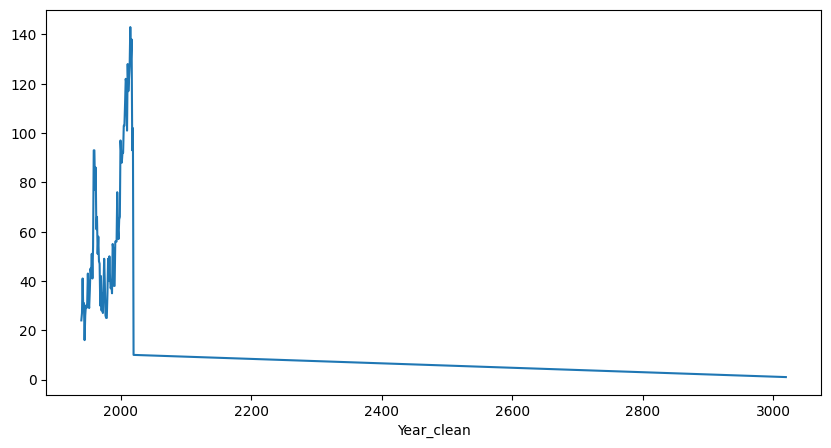

In [92]:
#4 contiuned
df_1940 = df[df['Year_clean'] >= 1940]
attacks_per_year = df_1940.groupby('Year_clean').size()
attacks_per_year.plot(figsize=(10,5))
#evidently it does seem to be incresing overtime, idk how to fix it so it doesent go past 2025 though cause obvisly theres no data than so it drops

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4166749340.py:5: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')  # grab numbers only


<Axes: >

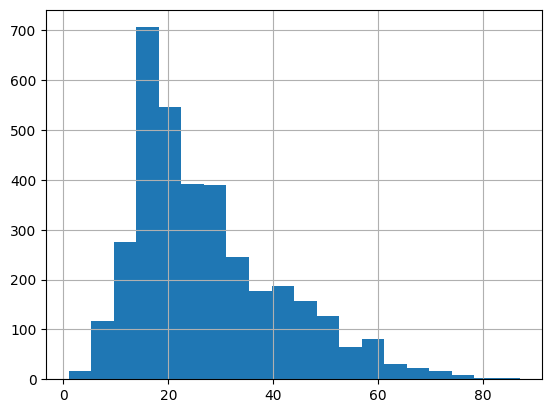

In [93]:
#5 the historgram
df['Age_clean'] = (
    df['Age']
    .astype(str)
    .str.extract('(\d+)')  # grab numbers only
    .astype(float)
)
df['Age_clean'].dropna().hist(bins=20)

In [94]:
#6
df['Type_clean'] = df['Type'].str.title()

df['Type_clean'] = df['Type_clean'].where(
    df['Type_clean'].isin(['Provoked', 'Unprovoked']),
    'Unknown'
)
type_props = df['Type_clean'].value_counts(normalize=True)
type_props #bsaically 72% are unprovoked

,proportion
Type_clean,
Unprovoked,0.729805
Unknown,0.178428
Provoked,0.091767


In [98]:
#7
df['Fatal_clean'] = df['Fatal (Y/N)'].str.upper()

df['Fatal_clean'] = df['Fatal_clean'].where(
    df['Fatal_clean'].isin(['Y', 'N']),
    'Unknown'
)

#8
fatal_by_type = pd.crosstab(
    df['Type_clean'],
    df['Fatal_clean'],
    normalize='index'
)

fatal_by_typeys
#Unprovked attacks are more wayyy more fatel than provoked attacks. The shark is probs already in eating mode when going for a victem, which means that you as the food have a much worse time of escaping.

Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.954469,0.013491,0.032040
Unknown,0.359063,0.475282,0.165655
Unprovoked,0.733461,0.013995,0.252545


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. The paper is targeting how to structure data sets for anyaslis.
2. From the text " designed to facilitate
initial exploration and analysis of the data, and to simplify the development of data analysis
tools that work well together."
3. Bascially for the first one, all datasets are datasets, so you know what you wanna do, but what makes there issues differnt is diffrent among all datasets. For the second quote, I think its trying to paint a picture of how although data "shows" us an answer, those answers are based upon conclusions that the person who colected data had. (Basically intrisic bias)
4. From the text "A dataset is a collection of values, usually either numbers (if quantitative) or strings (if
qualitative). Values are organised in two ways. Every value belongs to a variable and an
observation. A variable contains all values that measure the same underlying attribute (like
height, temperature, duration) across units. An observation contains all values measured on
the same unit (like a person, or a day, or a race) across attributes.
"
5. From the text "Tidy data is a standard way of mapping the meaning of a dataset to its structure."
6. These are the top 5
• Column headers are values, not variable names.
• Multiple variables are stored in one column.
• Variables are stored in both rows and columns.
• Multiple types of observational units are stored in the same table.
• A single observational unit is stored in multiple tables.
The format of the table is just bad, should be flipped. Metling is turing columns into rows.
7. Table 11 had a bunch of excess columns, meanwhile the tidy/molten one simplies the data by presenting it more sysenctly without the extra columns

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
#1
df = pd.read_csv('./data/ForeignGifts_edu.csv')
df.head()
#

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


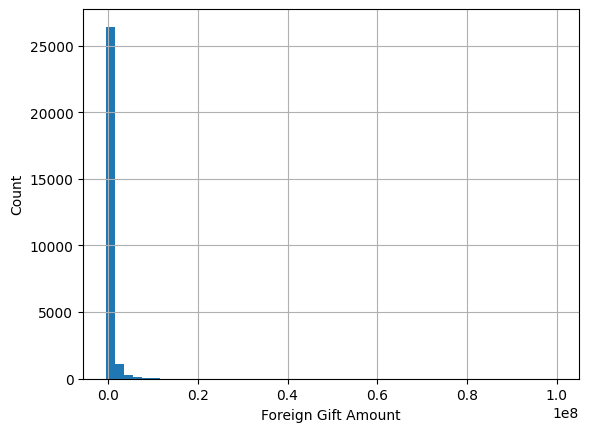

In [110]:
df['Foreign Gift Amount'].describe()
df['Foreign Gift Amount'].dropna().hist(bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.show()
#its very left skewed

In [111]:
#3
gift_type_counts = df['Gift Type'].value_counts()
gift_type_props = df['Gift Type'].value_counts(normalize=True)

gift_type_counts
gift_type_props
#61% are contarct, 38% are monteray, and a very small amount are real estate

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


In [115]:
#4
top15_countries_count = (
    df.groupby('Country of Giftor')
      .count()['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)

top15_countries_count

,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [117]:
#4
top15_countries_amount = (
    df.groupby('Country of Giftor')['Foreign Gift Amount']
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top15_countries_amount #gifts given

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [119]:
#5
top15_institutions = (
    df.groupby('Institution Name')['Foreign Gift Amount']
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top15_institutions

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


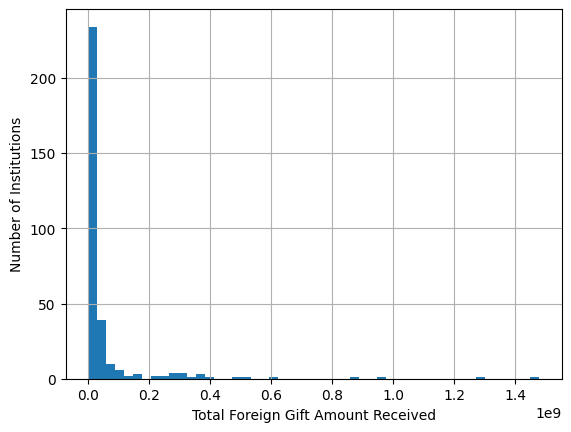

In [120]:
institution_totals = (
    df.groupby('Institution Name')['Foreign Gift Amount']
      .sum()
)

institution_totals.hist(bins=50)
plt.xlabel("Total Foreign Gift Amount Received")
plt.ylabel("Number of Institutions")
plt.show()

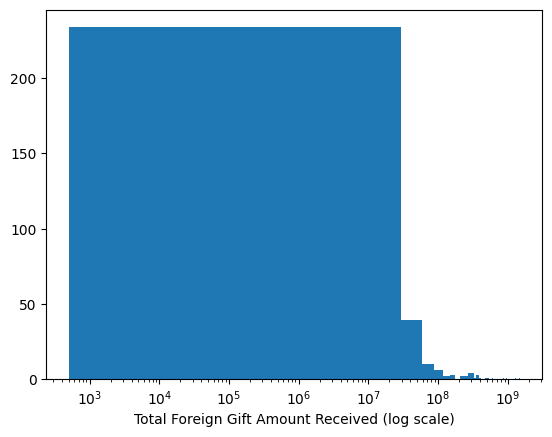

In [121]:
plt.hist(institution_totals, bins=50)
plt.xscale('log')
plt.xlabel("Total Foreign Gift Amount Received (log scale)")
plt.show() #more readible version

In [124]:
#6
top15_giftors = (
    df.groupby('Giftor Name')['Foreign Gift Amount']
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top15_giftors #qatar foundation did the most

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('./data/college_completion.csv')
df.head() #Q1 and 2

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [101]:
pd.crosstab(df['control'], df['level'])  #3
#private for profit is most equals, private not-for-profit obhvi more 4 year, and public is semi equal, with a 2 year lean

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


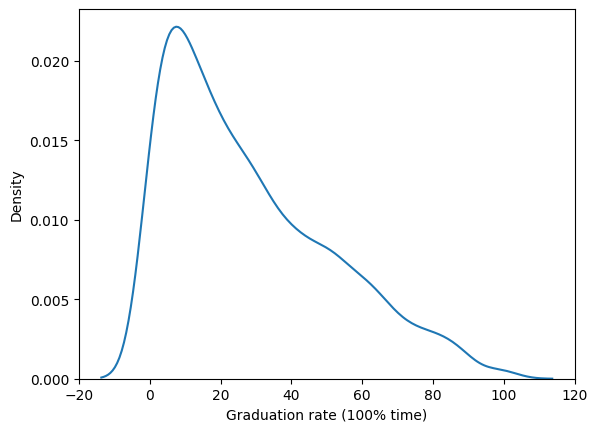

In [102]:
sns.kdeplot(df['grad_100_value'].dropna())
plt.xlabel("Graduation rate (100% time)")
plt.show() #4

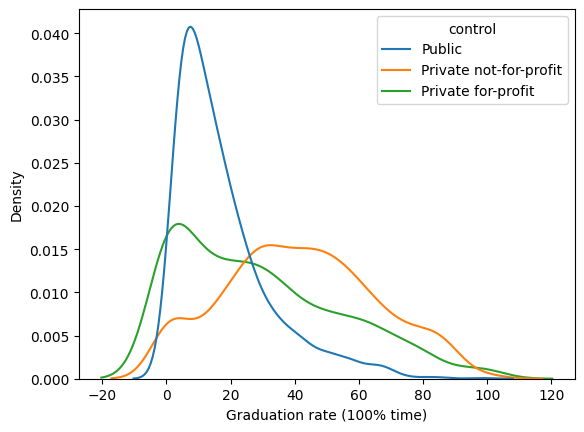

In [103]:
#4 contuinded
sns.kdeplot(data=df, x='grad_100_value', hue='control', common_norm=False)
plt.xlabel("Graduation rate (100% time)")
plt.show()
#it seems private not for profit are the besst.

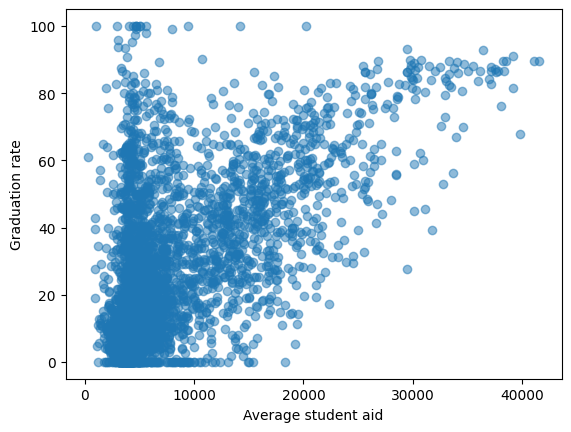

In [104]:
#5
plt.scatter(df['aid_value'], df['grad_100_value'], alpha=0.5)
plt.xlabel("Average student aid")
plt.ylabel("Graduation rate")
plt.show()

In [105]:
df[['aid_value', 'grad_100_value']].cov()
df[['aid_value', 'grad_100_value']].corr()

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


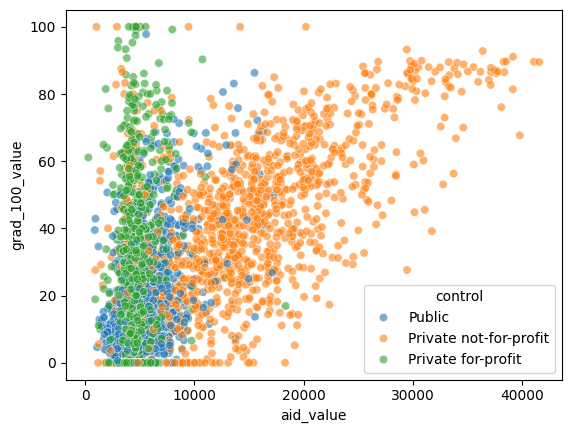

In [107]:
sns.scatterplot(
    data=df,
    x='aid_value',
    y='grad_100_value',
    hue='control',
    alpha=0.6
)
plt.show()

In [ ]:
#again, Private not-for-profit shows the best postive corraltion.

In [106]:
df.groupby('control')[['aid_value', 'grad_100_value']].corr()

aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [136]:
#1
df = pd.read_csv('./data/ames_prices.csv')
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


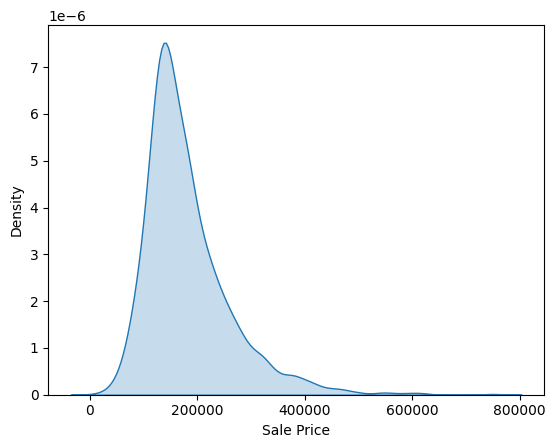

In [138]:
sns.kdeplot(df['price'], fill=True)
plt.xlabel("Sale Price")
plt.show()

In [139]:
df['price'].describe()
#left skewed

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


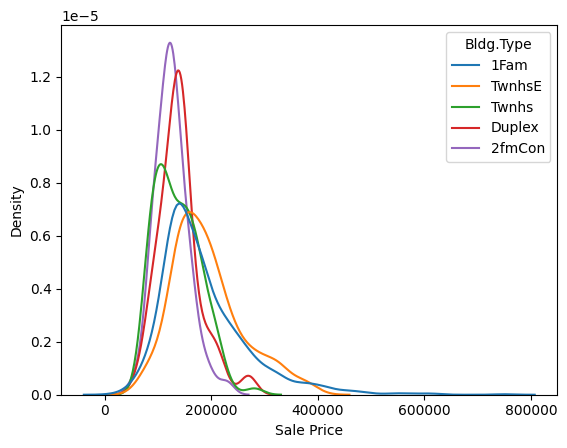

In [140]:
#2
sns.kdeplot(
    data=df,
    x='price',
    hue='Bldg.Type',
    common_norm=False
)
plt.xlabel("Sale Price")
plt.show()
#1fam got the highest prices,and varince.

In [141]:
df.groupby('Bldg.Type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


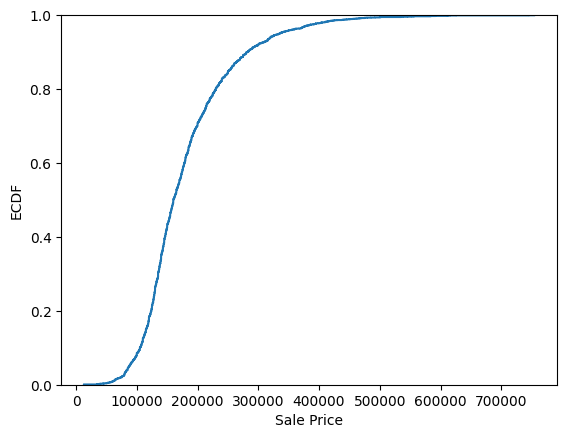

In [142]:
#3
sns.ecdfplot(df['price'])
plt.xlabel("Sale Price")
plt.ylabel("ECDF")
plt.show()

In [143]:
df['price'].quantile([0, 0.25, 0.5, 0.75, 1])

,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


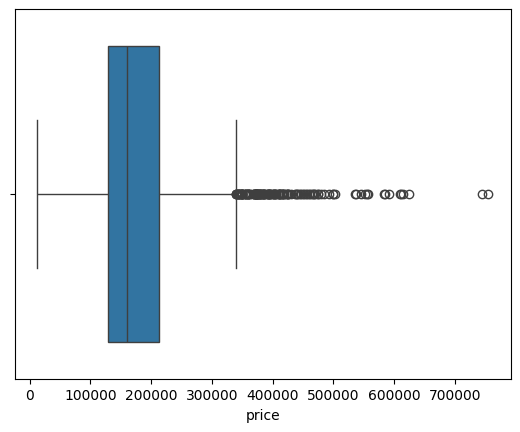

In [144]:
#4
sns.boxplot(x=df['price'])
plt.show()

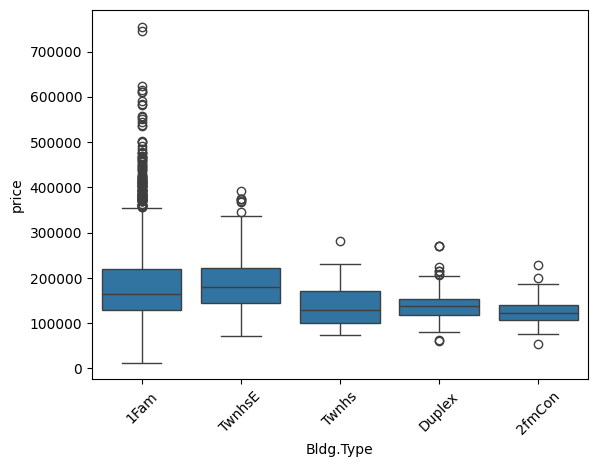

In [145]:
#4 contune
sns.boxplot(
    data=df,
    x='Bldg.Type',
    y='price'
)
plt.xticks(rotation=45)
plt.show() #theres lots of outlaiers on the 1fam

In [147]:
#5
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df['price_outlier'] = (df['price'] > upper_bound).astype(int)

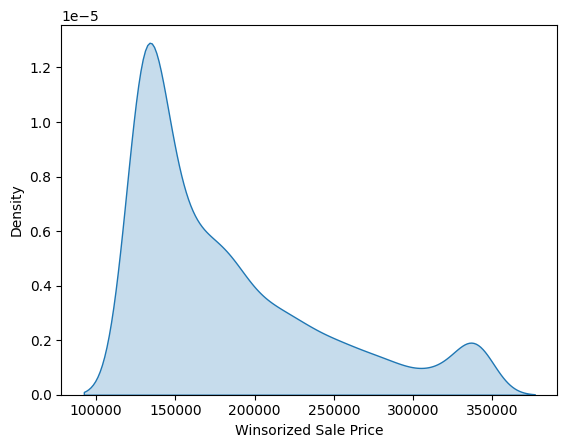

In [148]:
#6
df['price_winsor'] = df['price'].clip(lower=Q1, upper=upper_bound)
sns.kdeplot(df['price_winsor'], fill=True)
plt.xlabel("Winsorized Sale Price")
plt.show()
#Winsorization reduced the amount of outliers, which maade it wayyy less left skewed, so we can acatully see the varince better.

In [149]:
df['price_winsor'].describe()

,price_winsor
count,2930.000000
mean,183120.526280
std,61220.973982
min,129500.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,339500.000000
